# Домашняя работа №2

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

Генеральная совокупность - это все существующие значения. Статистическая выборка - случайно выбранное подмножество генеральной совокупности.

- Если размер выборки больше 200, то такая выборка является репрезентативной?

Нельзя ответить однозначно. Все сильно зависит от размера генеральной совокупности, а так же от способа формирования случайной выборки.
Оценка репрезентативности выборки осуществляется в тесной связи с предметом исследования. 

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

1. Длина волос футболистов в плей-офф ЧМ-2018.
2. Длина волос футболистов фрунцузов.
3. Длина волос футболистов французов выходивших в финал ЧМ с 1998 года.

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

1. Берем по n детей из каждого месяца, каждого года, начиная с момента исследования.
2. За каждый год берем по n результатов из каждого родильного дома Волгограда.

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


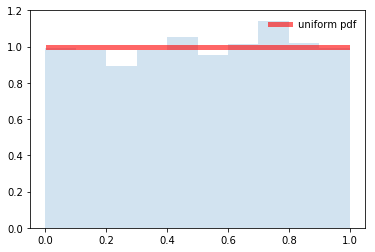

In [8]:
#uniform distribution
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r = stats.uniform.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [27]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = np.median(sample)
mean = sample.mean()

#your code here
overshoot = np.array([10, -11, 132, 44])
sample_with_overshoot = np.concatenate((sample, overshoot))
new_med = np.median(sample_with_overshoot)
new_mean = sample_with_overshoot.mean()
print(med, new_med)
print(mean, new_mean)
# медиана - робастная (устойчивая), среднее - нет


3.3563837737922775 3.652137833647559
3.6494034020956945 6.565810427397826


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [35]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
mean_with_c = np.array([x + C for x in sample]).mean()
mean_mult_c = np.array([x * C for x in sample]).mean()
print(mean, mean_with_c, mean_mult_c)


2.01 2.51 1.005


Таким образом, добавление константы к выборке эквивалентно добавлению этой константы к среднему, а умножение на константу - эквивалентно умножению среднего на эту константу

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [ ]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = 
sample_with_overshoot =
new_var =

- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [ ]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [ ]:
beta_rv = stats.beta(1,3)
#your code here

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [ ]:
gamma_rv = stats.gamma(2,2)

#your code here
mean =
var =
med =

- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

In [ ]:
#your code here
norm_rv = stats.norm(5,2)

for i in range(10000):
    sample = norm_rv.rvs(50)
    #your code here

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

In [ ]:
#your code here

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [ ]:
expon_rv = stats.expon(3)

new_rv = #your code here

## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [ ]:
#your code here

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [ ]:
#your code here

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [ ]:
norm_rv = stats.norm(0, 2)
#your code here

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#your answer here

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


In [ ]:
#your answer here

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#your answer here

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

In [ ]:
#your code here

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [ ]:
#your code here

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [ ]:
#your code here

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [ ]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#your code here